# Assignment 1: Comparison between Feed-Forward Neural Networks and Convolutional Neuronal Networks

- **Student Name 1**: Antón Aba
- **Student Name 2**: Arturo Pinar
- **Student Name 3**: Ignacio Regaña

The assignments should be done in groups of three people. Please write your names and emails in the above list now. 

In this assignment you have to solve an image classification problem. To this end you must train and compare two deep neuronal networks : a Feed Forward Neuronal Network (ffNN) with dense connections between layers and a Convolutional Neuronal Network (CNN).

We provide you with a very basic implementation of both networks, and encourage you to seek for the best design: How many layers? How many neurons per layer? What type of optimizer and activation function gives the better results? What regularization? Explain your decisions.

Please ensure that all your notebook cells can be correctly executed from scratch before submission. To do so, you can click in "Kernel" > "Restart and Run All".

To promote good results, we have created two challenges called "The ffNN challenge 2021" and "The CNN challenge 2021" where you must publish every good result that you obtain (keep in mind that the position in these competitions will determine 10% of your grade in this unit).

By March 22nd 2021, before 23:55, you have to upload to Moodle a brief presentation **in .PDF format** describing:

- The design of both networks
- The optimization process that you use
- The training and validation curves of each network
- How each decision you have made impacted on the accuracy
- The advantages of CNNs versus ffNNs

Some of you will present their results to the rest of the class on March 23rd. We will contact those selected in the morning of March 23rd.

NOTE: You DON'T have to upload the code in this deadline. There will be a final deadline on April 5th where you will have to upload all the code of the two parts of the assignment in this unit. Here, upload only your presentation **in .PDF format**.

# CIFAR 100 Dataset

To compare both types of networks we are going to use the CIFAR dataset, which contains 100 different object clases that the learnt networks should predict. Each sample of the dataset is a RGB image of size 32x32.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')


169009152/169001437 [==============================] - 2s 0us/step


100


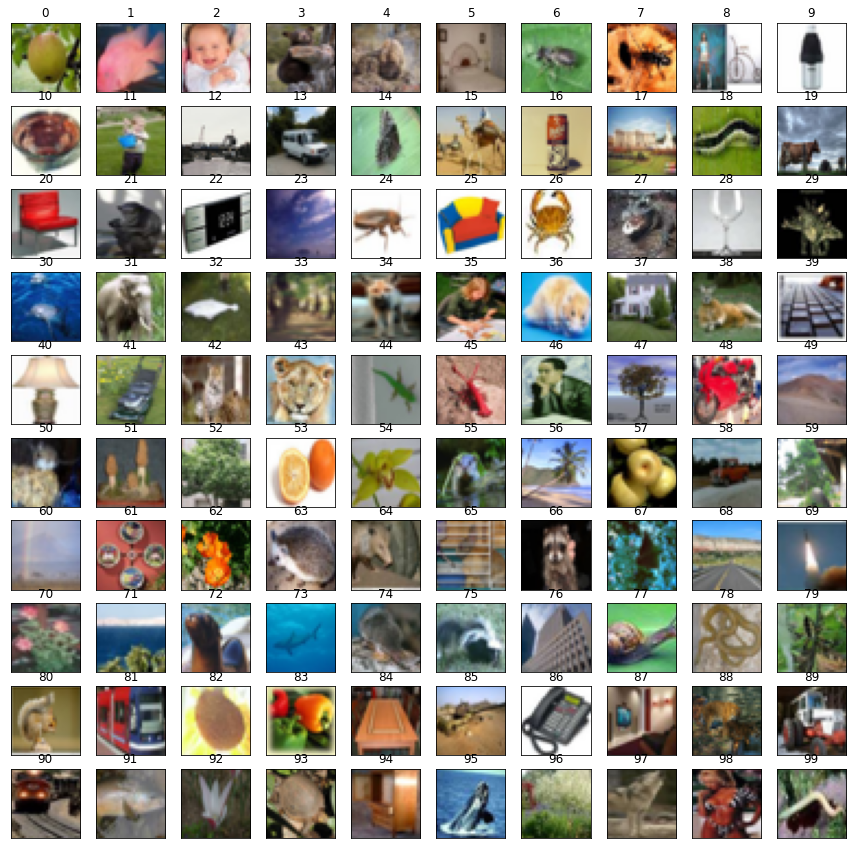

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)
print(num_classes)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()



In [3]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from tensorflow.keras.utils import to_categorical
# Converts a class vector (integers) to binary class matrix
tr_labels = to_categorical(y_train, num_classes)
va_labels = to_categorical(y_val, num_classes)
te_labels = to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [4]:
# Tensorboard
from time import time
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Train a Feed-Forward Neural Network

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras import layers, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

def create_model(nNeurons, l): 
    fnn = Sequential()
    fnn.add(Flatten(input_shape=(CIFAR_SIZE[0], CIFAR_SIZE[1], 3)))
    fnn.add(Dense(2048, activation = "relu"))
    fnn.add(Dropout(0.05))
    
    fnn.add(BatchNormalization())
    fnn.add(Dense(1024, activation = "relu"))
    fnn.add(Dropout(0.05))
    
    fnn.add(BatchNormalization())
    fnn.add(Dense(512, activation = "relu"))
    fnn.add(Dropout(0.05))
    
    fnn.add(BatchNormalization())
    fnn.add(Dense(256, activation = "relu"))
    fnn.add(Dropout(0.05))
    
    fnn.add(BatchNormalization())
    fnn.add(Dense(100, activation = "softmax", kernel_regularizer = regularizers.l1(0.001)))
    opt = None
    opt = optimizers.Adamax(lr = l)
        
    fnn.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])
    
    return fnn



# "optimizer" : [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],

# SGD: 

print("--------------------------- RESULTS FOR Adamax: ------------------------------------------------ ")

lrs = [0.0005]
for l in lrs:
    print("Learning rate: " + str(l))
    model = create_model(406, l)
    callback = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    # Nos interesa val_loss pq val_accuracy varia. 
    
    history = model.fit(x_train, tr_labels,callbacks = [callback], batch_size=20, epochs=2000, verbose=2, validation_data=(x_val, va_labels))
    model.save("final model.h5")
    #del data
    del model
    print("#################################################################")

--------------------------- RESULTS FOR Adamax: ------------------------------------------------ 
Learning rate: 0.0005
Epoch 1/2000
2000/2000 - 12s - loss: 5.6463 - accuracy: 0.0864 - val_loss: 5.1645 - val_accuracy: 0.1327
Epoch 2/2000
2000/2000 - 8s - loss: 5.0526 - accuracy: 0.1333 - val_loss: 4.8746 - val_accuracy: 0.1525
Epoch 3/2000
2000/2000 - 8s - loss: 4.7110 - accuracy: 0.1593 - val_loss: 4.5516 - val_accuracy: 0.1807
Epoch 4/2000
2000/2000 - 8s - loss: 4.4624 - accuracy: 0.1758 - val_loss: 4.4246 - val_accuracy: 0.1837
Epoch 5/2000
2000/2000 - 8s - loss: 4.2650 - accuracy: 0.1830 - val_loss: 4.1799 - val_accuracy: 0.1986
Epoch 6/2000
2000/2000 - 8s - loss: 4.1001 - accuracy: 0.1950 - val_loss: 4.1027 - val_accuracy: 0.1921
Epoch 7/2000
2000/2000 - 8s - loss: 3.9664 - accuracy: 0.2030 - val_loss: 3.9813 - val_accuracy: 0.2044
Epoch 8/2000
2000/2000 - 8s - loss: 3.8706 - accuracy: 0.2037 - val_loss: 3.9587 - val_accuracy: 0.1977
Epoch 9/2000
2000/2000 - 8s - loss: 3.7953 - ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
--------- Accuracy plot ------------------------


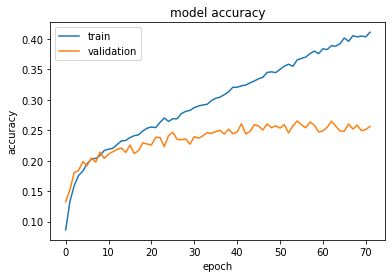

-------------------- Loss plot ----------------- 


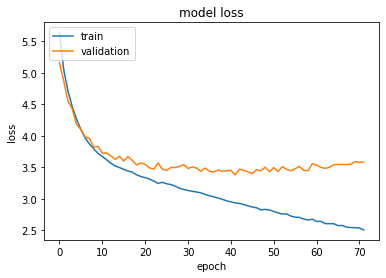

In [7]:
import matplotlib.pyplot as plt


print(history.history.keys())
#  "Accuracy"
print("--------- Accuracy plot ------------------------")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
print("-------------------- Loss plot ----------------- ")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
loaded_cnn = tf.keras.models.load_model('final model.h5')

start = time()
loss, acc = loaded_cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('FFNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

FFNN took 1.0156242847442627 seconds
Test loss: 3.3469297885894775 - Accuracy: 0.27230000495910645


# Train a convolutional Neural Network 

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Lambda, Dense, Flatten, MaxPooling2D, Dropout,Concatenate, BatchNormalization, Dropout, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2, l1, l1_l2
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
import numpy
from sklearn.model_selection import GridSearchCV

def create_cnn():
    
    cnn = Sequential()
    cnn.add(Conv2D(9, kernel_size=(5,5), padding='same', input_shape=(CIFAR_SIZE[0],CIFAR_SIZE[1],3)))
    cnn.add(Activation('relu'))
    
    cnn.add(Conv2D(18, strides=(2,2), kernel_size=(5,5), padding='same', kernel_regularizer=l2(2e-5), kernel_initializer="glorot_normal"))
    cnn.add(BatchNormalization())
    cnn.add(Activation('relu'))
    cnn.add(Dropout(0.3))
    
    cnn.add(Conv2D(36, strides=(2,2), kernel_size=(5,5), padding='same', kernel_regularizer=l2(2e-5), kernel_initializer="glorot_normal"))
    cnn.add(BatchNormalization())
    cnn.add(Activation('relu'))
    cnn.add(Dropout(0.3))
    
    cnn.add(Conv2D(72, strides=(2,2), kernel_size=(5,5), padding='same', kernel_regularizer=l2(2e-5), kernel_initializer="glorot_normal"))
    cnn.add(BatchNormalization())
    cnn.add(Activation('relu'))
    cnn.add(Dropout(0.3))
    
    cnn.add(Flatten())
    cnn.add(Activation('relu'))
    cnn.add(Dropout(0.3))
    
    cnn.add(Dense(num_classes))
    cnn.add(Activation('softmax'))
    
    opt = optimizers.Nadam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999)
    cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return cnn

cnn = create_cnn()

callback = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)
data = cnn.fit(x_train2, tr_labels, batch_size=35, epochs=20000, verbose=2, validation_data=(x_val, va_labels), callbacks=[callback])
cnn.save("model.h5")

Epoch 1/20000
1143/1143 - 12s - loss: 4.2541 - accuracy: 0.0679 - val_loss: 3.7020 - val_accuracy: 0.1365
Epoch 2/20000
1143/1143 - 10s - loss: 3.6371 - accuracy: 0.1479 - val_loss: 3.3873 - val_accuracy: 0.1953
Epoch 3/20000
1143/1143 - 10s - loss: 3.3377 - accuracy: 0.2019 - val_loss: 3.2959 - val_accuracy: 0.2181
Epoch 4/20000
1143/1143 - 10s - loss: 3.1276 - accuracy: 0.2387 - val_loss: 2.9932 - val_accuracy: 0.2679
Epoch 5/20000
1143/1143 - 10s - loss: 2.9898 - accuracy: 0.2664 - val_loss: 2.9838 - val_accuracy: 0.2754
Epoch 6/20000
1143/1143 - 10s - loss: 2.8820 - accuracy: 0.2860 - val_loss: 2.7901 - val_accuracy: 0.3098
Epoch 7/20000
1143/1143 - 10s - loss: 2.7919 - accuracy: 0.3040 - val_loss: 2.7814 - val_accuracy: 0.3171
Epoch 8/20000
1143/1143 - 10s - loss: 2.7233 - accuracy: 0.3185 - val_loss: 2.6289 - val_accuracy: 0.3421
Epoch 9/20000
1143/1143 - 10s - loss: 2.6688 - accuracy: 0.3289 - val_loss: 2.6463 - val_accuracy: 0.3385
Epoch 10/20000
1143/1143 - 10s - loss: 2.6126 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
--------- Accuracy plot ------------------------


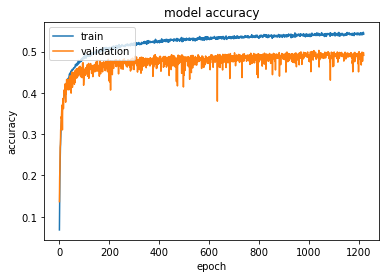

-------------------- Loss plot ----------------- 


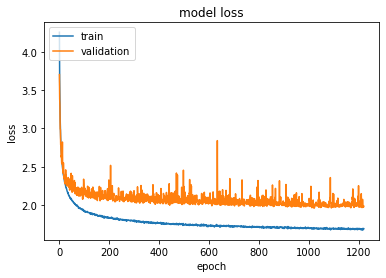

In [ ]:
import matplotlib.pyplot as plt


print(data.history.keys())
#  "Accuracy"
print("--------- Accuracy plot ------------------------")
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
print("-------------------- Loss plot ----------------- ")
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Evaluate and measure the inference time:

In [ ]:
loaded_cnn = tf.keras.models.load_model('model.h5')

start = time()
loss, acc = loaded_cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

CNN took 1.5344271659851074 seconds
Test loss: 1.9473081827163696 - Accuracy: 0.5016999840736389
